## 07 数据归一化处理
> 使用数据归一化处理的原因是如果我们采用欧拉距离来计算数据之间的距离，我们就会发现样本数据（是由肿瘤大小(x)和发现时间(y)组成）间的距离会被时间天数所主导，肿瘤的的大小变化相对与天数来说变化幅度较小，而天数的变化较大。如果不采用数据归一化处理的话，直接计算出样本之间的距离可能是有偏差的，不能够很好的同时反映样本中每一个特征的重要程度。

所谓数据归一化处理就是：将所有的数据映射到同一尺度。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 最值归一化 Normalization
> **概念：**就是将所有数据映射到0-1之间  
> **适用范围：** 适用于分布有明显边界的情况；受outlier影响较大。  
> Xscale = (X-Xmin)/(Xmax-Xmin)

In [3]:
x = np.random.randint(0, 100, 100)

In [4]:
x

array([41, 60,  2, 19, 49, 15, 19, 29,  7, 48, 16, 26, 86, 81, 84, 73, 36,
       23, 62, 92, 65, 83, 10,  2, 87, 53, 67, 21, 99, 19, 68, 30, 74, 90,
       24, 92, 74, 28, 38,  8, 43, 21, 99, 31, 74, 32, 43, 99,  2, 85,  5,
       83, 39,  8, 31, 90, 26,  7, 34, 50, 60, 51, 19,  0, 19, 38,  2,  3,
       71, 82, 86, 87, 88, 68, 85, 92, 24, 32,  3, 87, 39,  6, 48, 62, 70,
        0, 27, 89, 62, 88, 82, 35, 10, 46, 60, 19, 43, 35,  1, 29])

In [5]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.41414141, 0.60606061, 0.02020202, 0.19191919, 0.49494949,
       0.15151515, 0.19191919, 0.29292929, 0.07070707, 0.48484848,
       0.16161616, 0.26262626, 0.86868687, 0.81818182, 0.84848485,
       0.73737374, 0.36363636, 0.23232323, 0.62626263, 0.92929293,
       0.65656566, 0.83838384, 0.1010101 , 0.02020202, 0.87878788,
       0.53535354, 0.67676768, 0.21212121, 1.        , 0.19191919,
       0.68686869, 0.3030303 , 0.74747475, 0.90909091, 0.24242424,
       0.92929293, 0.74747475, 0.28282828, 0.38383838, 0.08080808,
       0.43434343, 0.21212121, 1.        , 0.31313131, 0.74747475,
       0.32323232, 0.43434343, 1.        , 0.02020202, 0.85858586,
       0.05050505, 0.83838384, 0.39393939, 0.08080808, 0.31313131,
       0.90909091, 0.26262626, 0.07070707, 0.34343434, 0.50505051,
       0.60606061, 0.51515152, 0.19191919, 0.        , 0.19191919,
       0.38383838, 0.02020202, 0.03030303, 0.71717172, 0.82828283,
       0.86868687, 0.87878788, 0.88888889, 0.68686869, 0.85858

In [26]:
X = np.random.randint(0, 100, (50, 2))

In [27]:
X[:10,:]

array([[46, 40],
       [54, 62],
       [79,  5],
       [53, 95],
       [64, 14],
       [65, 91],
       [25, 53],
       [96, 32],
       [67, 27],
       [86, 80]])

In [28]:
X = np.array(X, dtype=float)

In [29]:
X[:10,:]

array([[46., 40.],
       [54., 62.],
       [79.,  5.],
       [53., 95.],
       [64., 14.],
       [65., 91.],
       [25., 53.],
       [96., 32.],
       [67., 27.],
       [86., 80.]])

In [30]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))

In [31]:
X[:10,:]

array([[0.46464646, 0.40816327],
       [0.54545455, 0.63265306],
       [0.7979798 , 0.05102041],
       [0.53535354, 0.96938776],
       [0.64646465, 0.14285714],
       [0.65656566, 0.92857143],
       [0.25252525, 0.54081633],
       [0.96969697, 0.32653061],
       [0.67676768, 0.2755102 ],
       [0.86868687, 0.81632653]])

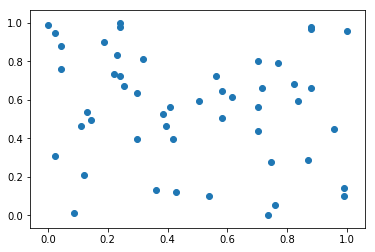

In [11]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [32]:
np.mean(X[:,0]) # 均值

0.5769696969696969

In [34]:
np.std(X[:,0]) # 方差

0.29956701059589913

In [35]:
np.mean(X[:,1])

0.5773469387755102

In [36]:
np.std(X[:,1])

0.2965376349295527

### 均值方差归一化 Standardization
> **概念：**把所有数据归一到均值为0方差为1的分布中  
> **适用范围：**数据分布没有明显的边界；有可能存在极端数据值  
> Xscale = (X-Xmean)/S

In [38]:
X2 = np.random.randint(0, 100, (50, 2))

In [39]:
X2 = np.array(X2, dtype=float)

In [40]:
X2[:10,:]

array([[28., 89.],
       [77., 46.],
       [79., 63.],
       [29.,  9.],
       [71., 38.],
       [39., 62.],
       [43., 82.],
       [36., 51.],
       [32., 61.],
       [44., 48.]])

In [41]:
X2[:,0] = (X2[:,0] - np.mean(X2[:,0])) / np.std(X2[:,0])
X2[:,1] = (X2[:,1] - np.mean(X2[:,1])) / np.std(X2[:,1])

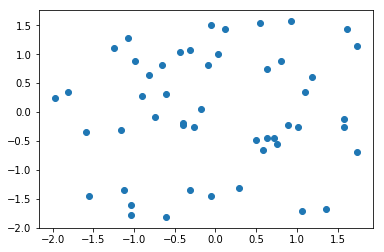

In [42]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [43]:
np.mean(X2[:,0])

3.552713678800501e-17

In [44]:
np.std(X2[:,0])

1.0

In [45]:
np.mean(X2[:,1])

1.7763568394002505e-17

In [46]:
np.std(X2[:,1])

0.9999999999999999